# T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)" data-toc-modified-id="T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)-1">T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)</a></span></li><li><span><a href="#Set-Parameters" data-toc-modified-id="Set-Parameters-2">Set Parameters</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-3">Fetch Data</a></span></li><li><span><a href="#Preview-Data" data-toc-modified-id="Preview-Data-4">Preview Data</a></span></li><li><span><a href="#Plot-All-Data" data-toc-modified-id="Plot-All-Data-5">Plot All Data</a></span></li><li><span><a href="#Inspect-Transaction-Volumes" data-toc-modified-id="Inspect-Transaction-Volumes-6">Inspect Transaction Volumes</a></span></li><li><span><a href="#Monthly-Plot" data-toc-modified-id="Monthly-Plot-7">Monthly Plot</a></span></li><li><span><a href="#Conclusions-on-original-data" data-toc-modified-id="Conclusions-on-original-data-8">Conclusions on original data</a></span></li></ul></div>

# Set Parameters

In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05

"yyyy.mm.dd"

# Fetch Data

In [2]:
include("available_datasets.jl") 
dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv
include("fetch_dataset.jl") 
df = fetch_dataset(dataset_file_name, date_format)
size(df)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: include("available_datasets.jl") 
        dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
        df = fetch_dataset(dataset_file_name)
    


(254, 7)

# Preview Data

In [3]:
include("preview_data.jl")
preview_data(df)


    Usage:
          preview_data(df)
          preview_data(df[1:2,1:3])
    
20×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 2019-09-17 │ 46.0    │ 46.0    │ 46.0    │ 46.0    │ 45.7234   │
│ 2   │ 2019-10-04 │ 44.69   │ 44.69   │ 44.69   │ 44.69   │ 44.4213   │
│ 3   │ 2019-10-23 │ 44.57   │ 44.57   │ 44.57   │ 44.57   │ 44.302    │
│ 4   │ 2019-11-11 │ 46.14   │ 46.14   │ 46.14   │ 46.14   │ 45.8626   │
│ 5   │ 2019-11-29 │ 47.92   │ 47.92   │ 47.92   │ 47.92   │ 47.6319   │
│ 6   │ 2019-12-18 │ 48.07   │ 48.07   │ 48.07   │ 48.07   │ 48.07     │
│ 7   │ 2020-01-08 │ 49.93   │ 49.93   │ 49.93   │ 49.93   │ 49.93     │
│ 8   │ 2020-01-28 │ 50.44   │ 50.44   │ 50.44   │ 50.44   │ 50.44     │
│ 9   │ 2020-02-14 │ 53.08   │ 53.08   │ 53.08   │ 53.08   │ 53.08     │
│ 10  │ 2020-03-05 │ 47.57   

# Plot All Data

In [14]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


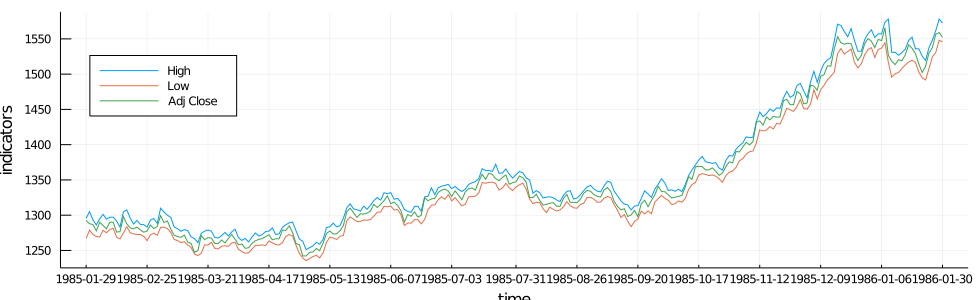

In [16]:
using Plots

rows = 1:254
gr()
plot(df[ rows,1 ], 
    [           df[rows,3]   df[rows,4]  df[rows,6]  ], 
    label    = [columns[3]   columns[4]  columns[6]  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )

# Inspect Transaction Volumes

In [41]:
using Statistics
volumes = df[:,7]

println( "max volume ", maximum(volumes) )
println( "avg volume ", mean(volumes) ) # Statistics
println( "min volume ", minimum(volumes) )


max volume 2190810000
avg volume 1.4503477616926503e8
min volume 2530000


8980

In [42]:
volumes = volumes./1_000_000
length(volumes)

8980

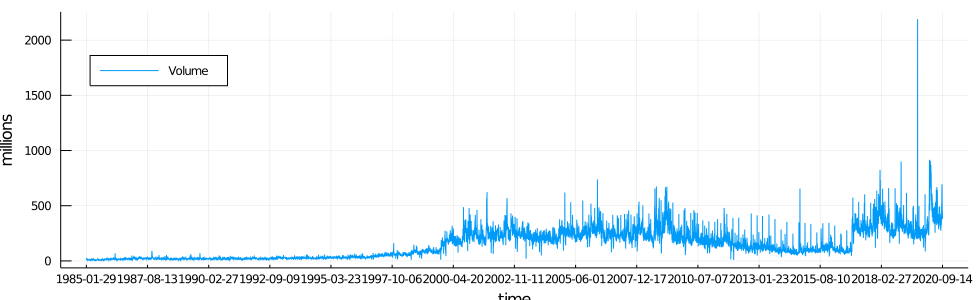

In [30]:
using Plots
gr()
plot(df[ :,1 ], volumes , 
    label    = [  columns[7]   ""   ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "millions",
    size     = (980, 300), # width, height
    layout   = (1, 1)
    )

In [7]:
include("compact_dates.jl")
dates = compact_dates(df[1])
size(dates)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: include("available_datasets.jl") 
        dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
        df = fetch_dataset(dataset_file_name)
    
usage: 
                dates = compact_dates( df[1] )
        


(8980,)

# Monthly Plot

In [8]:
y_data  = [ df[:,2]    ]
y_label = [ columns[2] ]

    for i in 3:length(columns)
        #println(i, " ", columns[i])
        push!(y_data, df[i])
        push!(y_label, columns[i])
    end 

[ columns[2], columns[3] ]
#y_label

2-element Array{String,1}:
 "Open"
 "High"

In [13]:
using Plots

function plot_monthly(df)
    include("compact_dates.jl")
    dates = compact_dates(df[1])
    rows = size(dates)
    
    columns = list_column_names(df)
    

    
    gr()
    plot(dates[:], df[:,2] , 
        label    =  columns[2]    , # empty "" are to make an array of String(s)
        legend   =:topleft, 
                  # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
        xlabel   = "time",
        ylabel   = "indicators",
        size     = (980, 300), # width, height
        layout = (1, 1)
        )
    
    for i in 2:length(columns)
        
            plot!(dates[:], df[:,i] , 
                label    =  columns[i]    , # empty "" are to make an array of String(s)
                )
    end 

end

plot_monthly(df)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: include("available_datasets.jl") 
        dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
        df = fetch_dataset(dataset_file_name)
    
usage: 
                dates = compact_dates( df[1] )
        


LoadError: UndefVarError: list_column_names not defined

# Conclusions on original data

- The dataset contain daily trading history
- displaying in the month increments would make sense if we average
- Volume is zero - dropping
- Adjusted Closing price - leaving